# Load libraries and dataset

https://www.kaggle.com/code/malekzadeh/smart-home-data-processing-weather-vs-energy

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from lazypredict.Supervised import LazyRegressor

In [2]:
energy_dataset = pd.read_csv("../datasets/habitat/homeC.csv")

C:\Users\matei\AppData\Local\Temp\ipykernel_9308\2422693284.py:1: DtypeWarning: Columns (0,27) have mixed types. Specify dtype option on import or set low_memory=False.
  energy_dataset = pd.read_csv("../datasets/habitat/homeC.csv")


In [3]:
energy_dataset

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,10.00,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,10.00,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,10.00,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,...,10.00,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,...,10.00,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503906,1452128306,1.599333,0.003233,1.599333,0.000050,0.104017,0.625033,0.041750,0.005233,0.008433,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503907,1452128307,1.924267,0.003217,1.924267,0.000033,0.422383,0.637733,0.042033,0.004983,0.008467,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503908,1452128308,1.978200,0.003217,1.978200,0.000050,0.495667,0.620367,0.042100,0.005333,0.008233,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503909,1452128309,1.990950,0.003233,1.990950,0.000050,0.494700,0.634133,0.042100,0.004917,0.008133,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51


# Exploratory data analysis

In [4]:
energy_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503911 entries, 0 to 503910
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   time                 503911 non-null  object 
 1   use [kW]             503910 non-null  float64
 2   gen [kW]             503910 non-null  float64
 3   House overall [kW]   503910 non-null  float64
 4   Dishwasher [kW]      503910 non-null  float64
 5   Furnace 1 [kW]       503910 non-null  float64
 6   Furnace 2 [kW]       503910 non-null  float64
 7   Home office [kW]     503910 non-null  float64
 8   Fridge [kW]          503910 non-null  float64
 9   Wine cellar [kW]     503910 non-null  float64
 10  Garage door [kW]     503910 non-null  float64
 11  Kitchen 12 [kW]      503910 non-null  float64
 12  Kitchen 14 [kW]      503910 non-null  float64
 13  Kitchen 38 [kW]      503910 non-null  float64
 14  Barn [kW]            503910 non-null  float64
 15  Well [kW]        

In [5]:
# Rename some columns to get rid of KW
energy_dataset.columns = [col.replace(' [kW]', '') for col in energy_dataset.columns]

# Sum up the furnaces and kitchens to simplify the dataset
energy_dataset['sum_Furnace'] = energy_dataset[['Furnace 1','Furnace 2']].sum(axis=1)
energy_dataset['avg_Kitchen'] = energy_dataset[['Kitchen 12','Kitchen 14','Kitchen 38']].mean(axis=1)

# Remove the columns and only keep the aggregated ones
energy_dataset = energy_dataset.drop(['Kitchen 12','Kitchen 14','Kitchen 38'], axis=1)
energy_dataset = energy_dataset.drop(['Furnace 1','Furnace 2'], axis=1)
energy_dataset.columns

Index(['time', 'use', 'gen', 'House overall', 'Dishwasher', 'Home office',
       'Fridge', 'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave',
       'Living room', 'Solar', 'temperature', 'icon', 'humidity', 'visibility',
       'summary', 'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
       'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability',
       'sum_Furnace', 'avg_Kitchen'],
      dtype='object')

In [6]:
# Overall usage (use) and House overall are the same so we can drop one of the two.
energy_dataset = energy_dataset.drop(columns=['House overall'])
energy_dataset = energy_dataset.rename(columns={"use" : "Total House usage"})

In [7]:
energy_dataset

,time,Total House usage,gen,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,...,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,sum_Furnace,avg_Kitchen
0,1451624400,0.932833,0.003483,0.000033,0.442633,0.124150,0.006983,0.013083,0.031350,0.001017,...,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00,0.082617,0.000189
1,1451624401,0.934333,0.003467,0.000000,0.444067,0.124000,0.006983,0.013117,0.031500,0.001017,...,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00,0.084533,0.000189
2,1451624402,0.931817,0.003467,0.000017,0.446067,0.123533,0.006983,0.013083,0.031517,0.001000,...,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00,0.083017,0.000206
3,1451624403,1.022050,0.003483,0.000017,0.446583,0.123133,0.006983,0.013000,0.031500,0.001017,...,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00,0.175417,0.000217
4,1451624404,1.139400,0.003467,0.000133,0.446533,0.122850,0.006850,0.012783,0.031500,0.001017,...,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00,0.300917,0.000261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503906,1452128306,1.599333,0.003233,0.000050,0.041750,0.005233,0.008433,0.013433,0.032200,0.000950,...,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51,0.729050,0.000200
503907,1452128307,1.924267,0.003217,0.000033,0.042033,0.004983,0.008467,0.012933,0.032283,0.001000,...,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51,1.060117,0.000200
503908,1452128308,1.978200,0.003217,0.000050,0.042100,0.005333,0.008233,0.012817,0.032183,0.000950,...,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51,1.116033,0.000217
503909,1452128309,1.990950,0.003233,0.000050,0.042100,0.004917,0.008133,0.012833,0.032167,0.000950,...,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51,1.128833,0.000217


In [8]:
# Transform time column to datetime type
time_index = pd.date_range('2016-01-01 05:00', periods=len(energy_dataset),  freq='min')
time_index = pd.DatetimeIndex(time_index)
energy_dataset = energy_dataset.set_index(time_index)
energy_dataset = energy_dataset.drop(['time'], axis=1)

In [9]:
# Replace non-numerical values with closes values
energy_dataset['cloudCover'].replace(['cloudCover'], method='bfill', inplace=True)
energy_dataset['cloudCover'] = energy_dataset['cloudCover'].astype('float')

In [10]:
energy_dataset

,Total House usage,gen,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,Microwave,...,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,sum_Furnace,avg_Kitchen
2016-01-01 05:00:00,0.932833,0.003483,0.000033,0.442633,0.124150,0.006983,0.013083,0.031350,0.001017,0.004067,...,29.26,1016.91,9.18,0.75,282.0,0.0000,24.40,0.00,0.082617,0.000189
2016-01-01 05:01:00,0.934333,0.003467,0.000000,0.444067,0.124000,0.006983,0.013117,0.031500,0.001017,0.004067,...,29.26,1016.91,9.18,0.75,282.0,0.0000,24.40,0.00,0.084533,0.000189
2016-01-01 05:02:00,0.931817,0.003467,0.000017,0.446067,0.123533,0.006983,0.013083,0.031517,0.001000,0.004067,...,29.26,1016.91,9.18,0.75,282.0,0.0000,24.40,0.00,0.083017,0.000206
2016-01-01 05:03:00,1.022050,0.003483,0.000017,0.446583,0.123133,0.006983,0.013000,0.031500,0.001017,0.004067,...,29.26,1016.91,9.18,0.75,282.0,0.0000,24.40,0.00,0.175417,0.000217
2016-01-01 05:04:00,1.139400,0.003467,0.000133,0.446533,0.122850,0.006850,0.012783,0.031500,0.001017,0.004067,...,29.26,1016.91,9.18,0.75,282.0,0.0000,24.40,0.00,0.300917,0.000261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-16 03:26:00,1.599333,0.003233,0.000050,0.041750,0.005233,0.008433,0.013433,0.032200,0.000950,0.003800,...,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51,0.729050,0.000200
2016-12-16 03:27:00,1.924267,0.003217,0.000033,0.042033,0.004983,0.008467,0.012933,0.032283,0.001000,0.003750,...,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51,1.060117,0.000200
2016-12-16 03:28:00,1.978200,0.003217,0.000050,0.042100,0.005333,0.008233,0.012817,0.032183,0.000950,0.003767,...,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51,1.116033,0.000217
2016-12-16 03:29:00,1.990950,0.003233,0.000050,0.042100,0.004917,0.008133,0.012833,0.032167,0.000950,0.003767,...,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51,1.128833,0.000217


<Axes: >

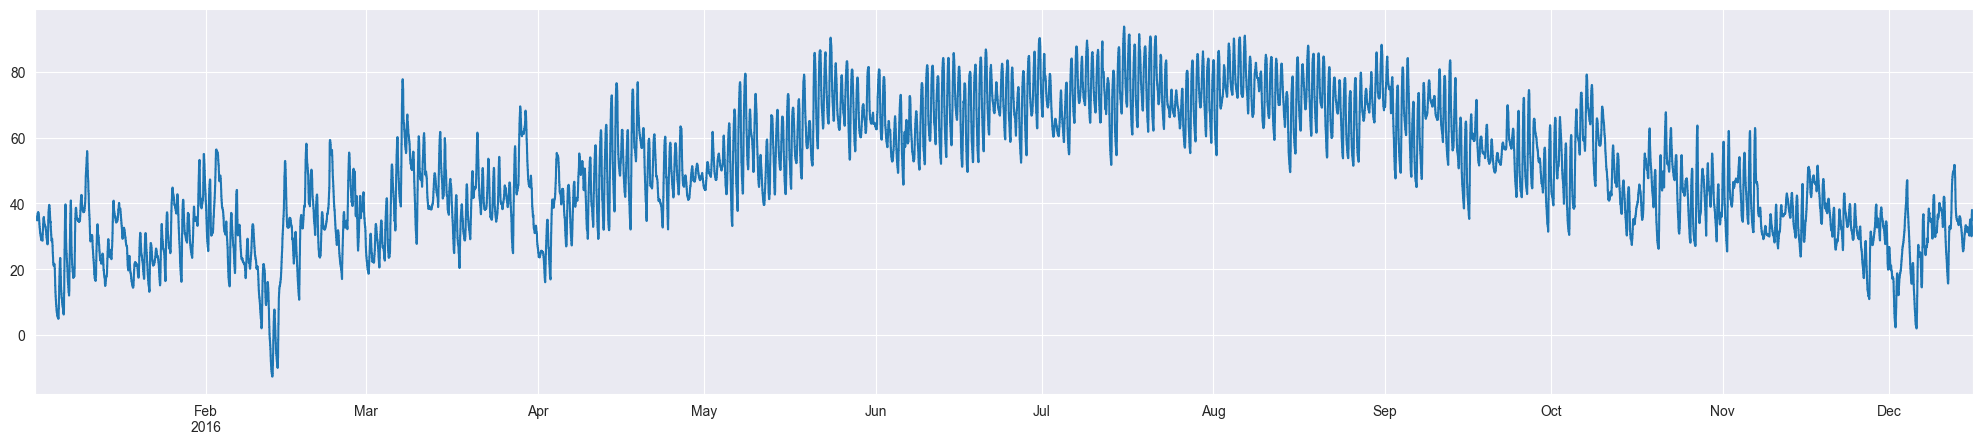

In [11]:
energy_dataset['temperature'].plot(figsize=(25,5))

<Axes: >

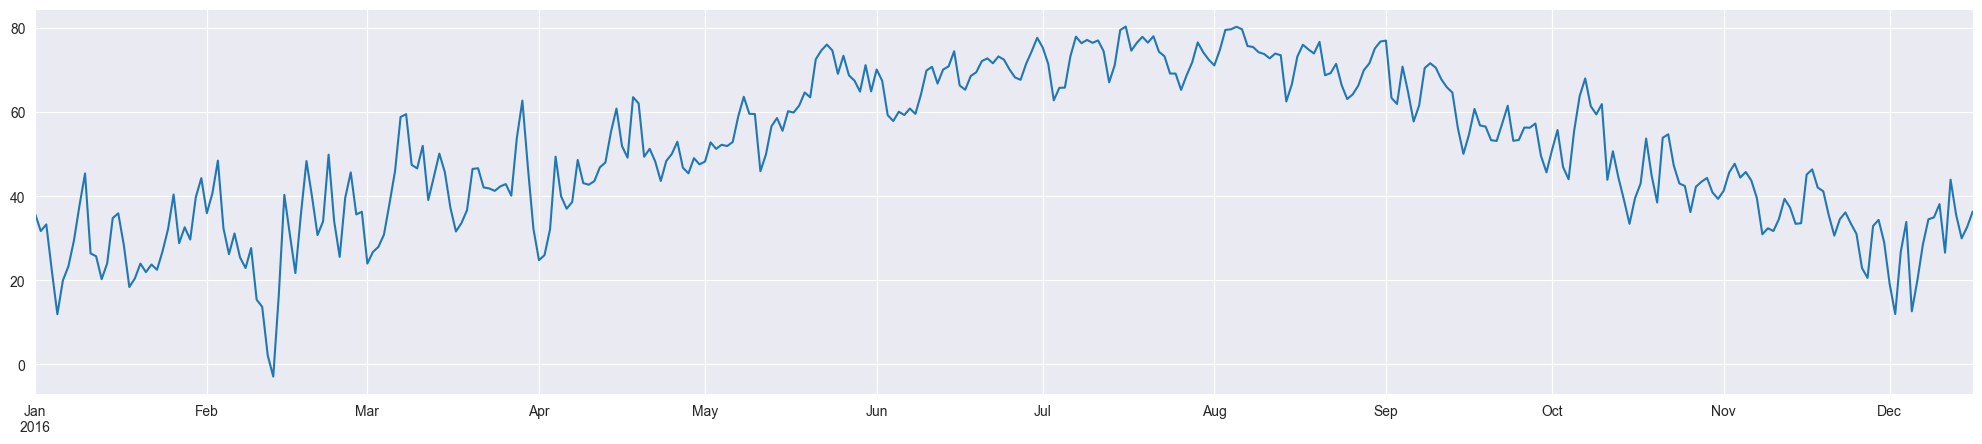

In [12]:
# Transforming the data by taking average temperature per day instead of temp every minute
energy_dataset['temperature'].resample(rule='D').mean().plot(figsize=(25,5))

<Axes: >

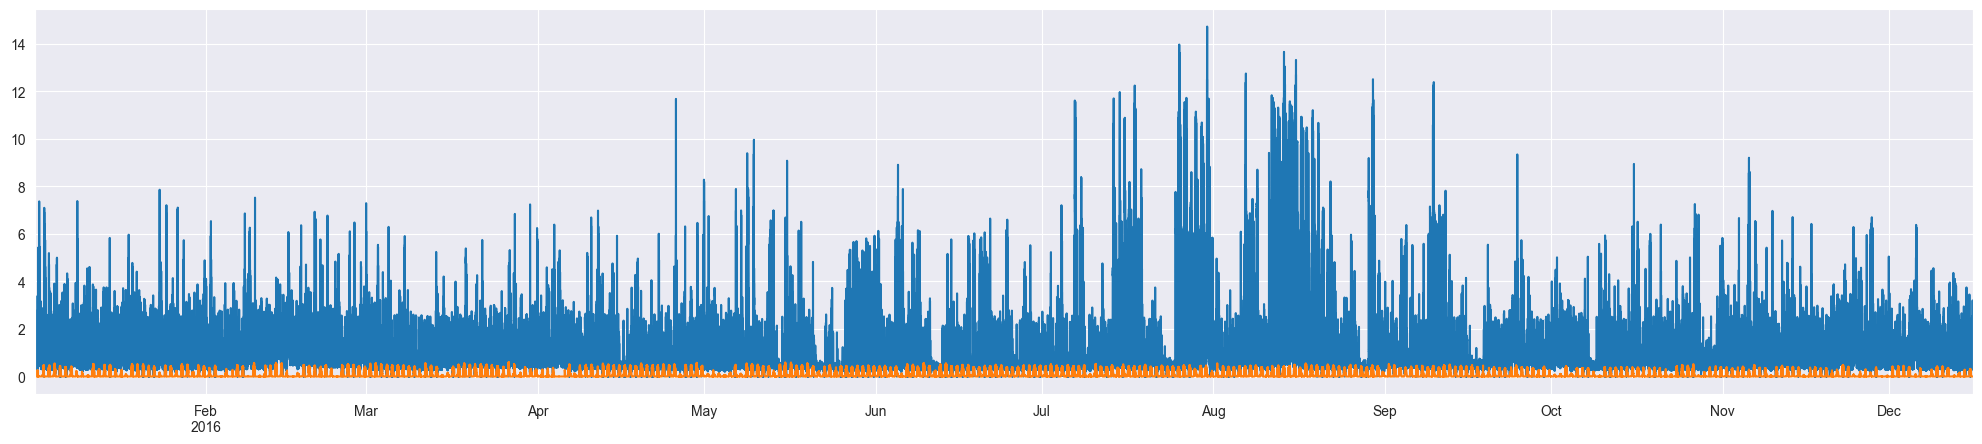

In [13]:
energy_dataset['Total House usage'].plot(figsize=(25,5)) ## Energy used
energy_dataset['gen'].plot(figsize=(25,5)) ## Energy generated

<Axes: >

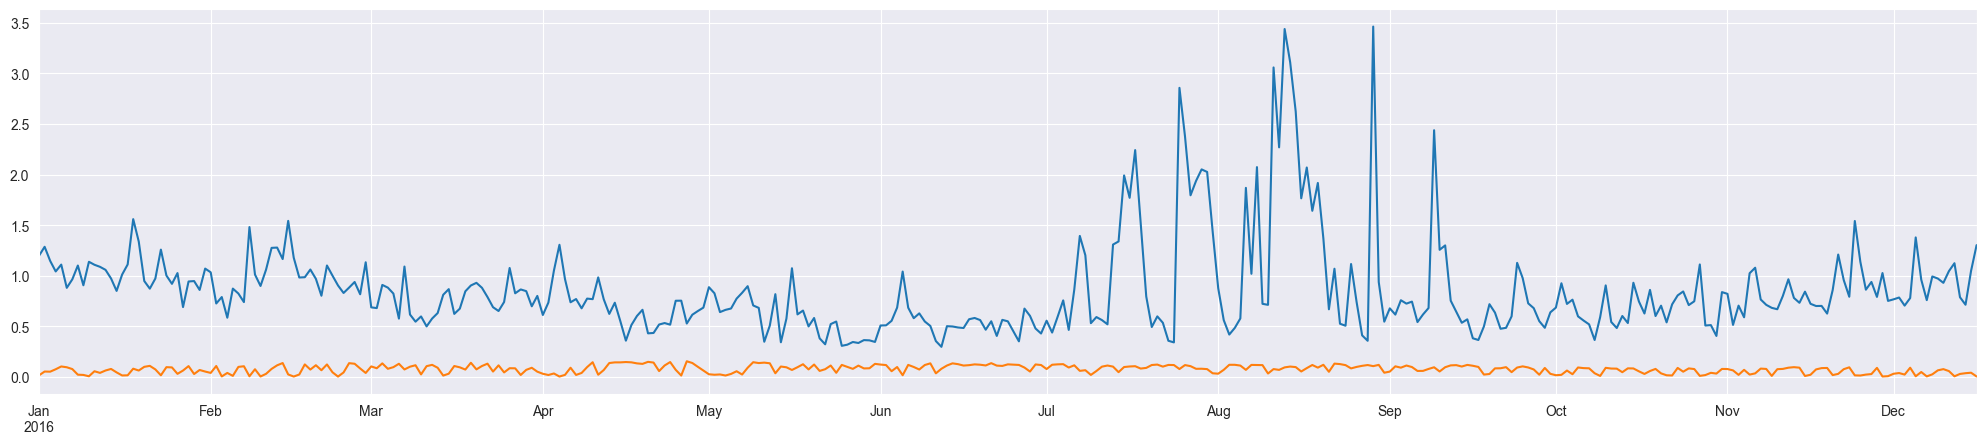

In [14]:
# Average consumption vs generation per day
energy_dataset['Total House usage'].resample(rule='D').mean().plot(figsize=(25,5)) ## Energy used
energy_dataset['gen'].resample(rule='D').mean().plot(figsize=(25,5)) ## Energy generated

<Axes: >

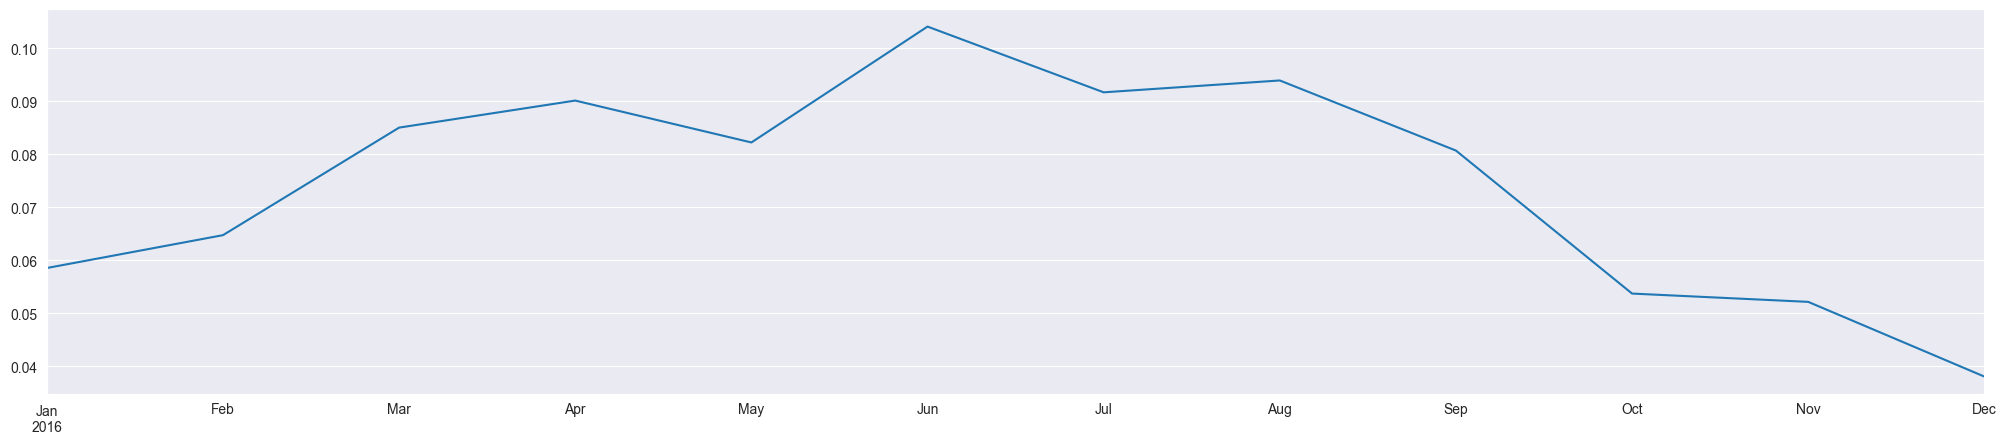

In [15]:
# Energy production from solar every month
energy_dataset['Solar'].resample(rule='M').mean().plot(figsize=(25,5))

<Axes: >

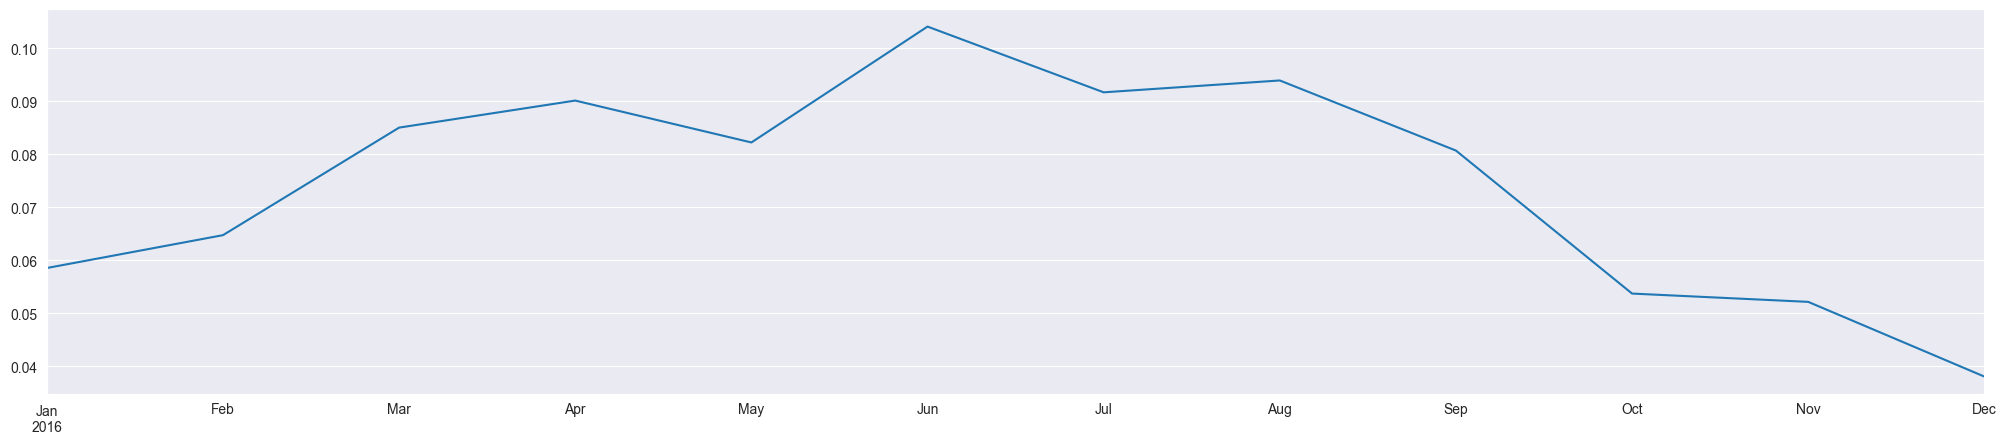

In [16]:
# We can see that all the house production comes from solar so we can remove one of the columns further
energy_dataset['gen'].resample(rule='M').mean().plot(figsize=(25,5))

In [17]:
# Overall usage (use) and House overall are the same so we can drop one of the two.
energy_dataset = energy_dataset.drop(columns=['Solar'])
energy_dataset = energy_dataset.rename(columns={"gen" : "Energy Generated (Solar)"})

In [18]:
energy_dataset.columns

Index(['Total House usage', 'Energy Generated (Solar)', 'Dishwasher',
       'Home office', 'Fridge', 'Wine cellar', 'Garage door', 'Barn', 'Well',
       'Microwave', 'Living room', 'temperature', 'icon', 'humidity',
       'visibility', 'summary', 'apparentTemperature', 'pressure', 'windSpeed',
       'cloudCover', 'windBearing', 'precipIntensity', 'dewPoint',
       'precipProbability', 'sum_Furnace', 'avg_Kitchen'],
      dtype='object')

<Axes: >

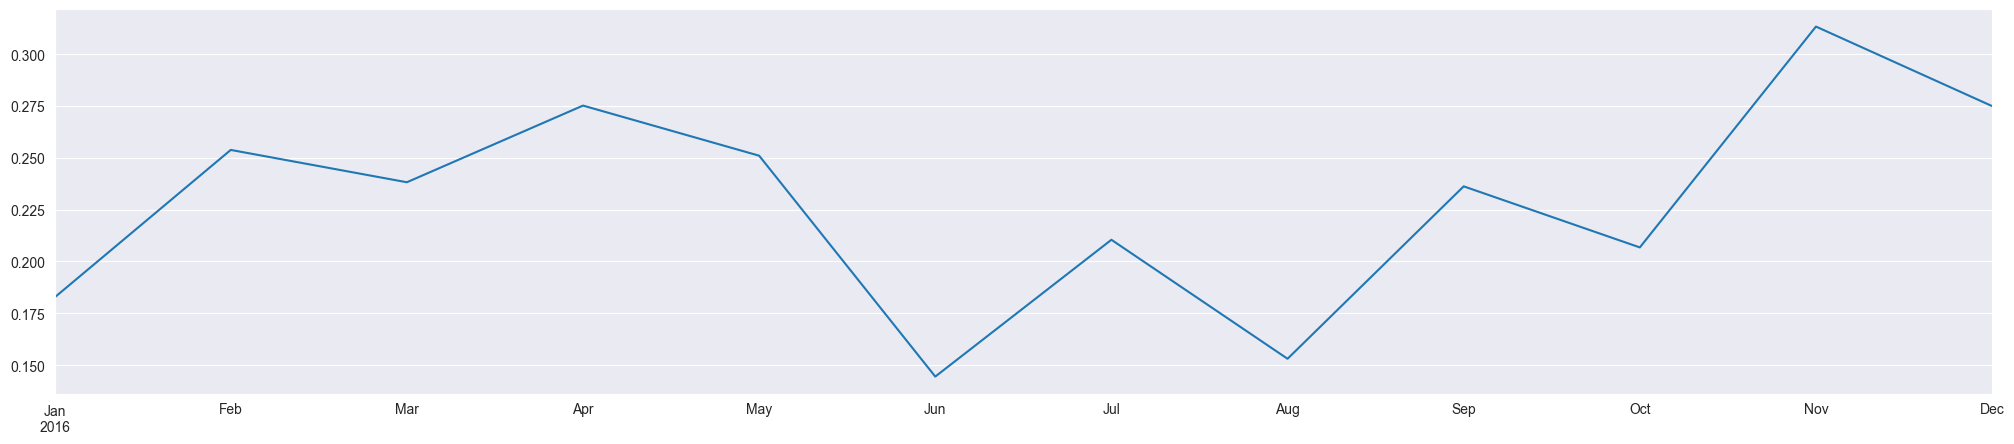

In [19]:
# There is an obvious relation between cloud coverage and energy generated
energy_dataset['cloudCover'].resample(rule='M').mean().plot(figsize=(25,5))

In [20]:
energy_dataset.corr().style.background_gradient(cmap='coolwarm')

C:\Users\matei\AppData\Local\Temp\ipykernel_9308\1991136982.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  energy_dataset.corr().style.background_gradient(cmap='coolwarm')


,Total House usage,Energy Generated (Solar),Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,Microwave,Living room,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,sum_Furnace,avg_Kitchen
Total House usage,1.000000,-0.131635,0.196272,0.147520,0.149223,0.124506,0.026531,0.196339,0.157281,0.114817,0.200350,0.010379,0.011511,-0.002609,0.005560,0.010730,-0.003853,-0.033460,0.011183,0.024836,0.016040,-0.003317,0.513503,0.103777
Energy Generated (Solar),-0.131635,1.000000,0.038204,-0.085421,-0.002862,0.062430,0.036328,0.036456,0.025112,0.000375,-0.047849,0.090983,0.007608,-0.017650,0.093793,-0.000222,-0.056554,0.000664,-0.007882,0.030447,0.089664,0.041192,-0.082863,-0.017690
Dishwasher,0.196272,0.038204,1.000000,0.065525,0.034020,-0.004619,-0.008958,0.006914,0.008316,-0.001197,0.000612,-0.015716,-0.001868,-0.008064,-0.014547,0.000211,-0.001672,-0.002395,0.004016,0.006265,-0.016099,0.008189,-0.004197,0.003272
Home office,0.147520,-0.085421,0.065525,1.000000,0.035013,0.003896,-0.013537,-0.038479,-0.006467,-0.007923,-0.052402,0.011908,-0.006008,0.020638,0.010856,0.027091,-0.017898,-0.039897,0.012427,-0.029890,0.007594,-0.032861,-0.017735,0.007517
Fridge,0.149223,-0.002862,0.034020,0.035013,1.000000,0.076183,-0.002380,-0.002205,0.010579,0.025698,0.054008,0.107466,0.030749,0.009019,0.107064,-0.000517,-0.024886,-0.023490,-0.008589,0.014253,0.115169,0.004794,-0.047486,0.011322
Wine cellar,0.124506,0.062430,-0.004619,0.003896,0.076183,1.000000,0.004393,0.006372,0.006686,0.013267,0.033997,0.289168,0.055541,0.030095,0.288882,0.018494,-0.052860,-0.040467,-0.025930,0.016588,0.298207,0.006571,-0.093372,0.005218
Garage door,0.026531,0.036328,-0.008958,-0.013537,-0.002380,0.004393,1.000000,0.017447,0.005698,-0.002093,0.004466,0.013511,-0.007399,0.002262,0.013578,-0.000276,0.000419,-0.007457,0.012327,-0.006941,0.008350,-0.006639,-0.012138,-0.000467
Barn,0.196339,0.036456,0.006914,-0.038479,-0.002205,0.006372,0.017447,1.000000,0.002568,0.002386,-0.007774,-0.017188,-0.002141,0.008376,-0.015189,0.011716,-0.015196,-0.011635,0.006255,-0.007258,-0.016738,-0.006063,-0.004299,-0.007801
Well,0.157281,0.025112,0.008316,-0.006467,0.010579,0.006686,0.005698,0.002568,1.000000,0.005573,0.078899,-0.004691,-0.006590,-0.001069,-0.004741,0.002994,0.000677,-0.003029,0.004085,-0.004377,-0.007346,-0.002788,0.020702,0.021382
Microwave,0.114817,0.000375,-0.001197,-0.007923,0.025698,0.013267,-0.002093,0.002386,0.005573,1.000000,0.096468,0.001369,0.012541,-0.018359,0.002265,-0.001248,-0.006129,0.009580,-0.006218,0.026936,0.006286,0.016222,-0.000414,0.016319


In [ ]:
energy_dataset = energy_dataset[:50000]
y = energy_dataset["Energy Generated (Solar)"]
X = energy_dataset.drop(columns=["Energy Generated (Solar)"])
offset = int(X.shape[0] * 0.7)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models,predictions = reg.fit(X_train, X_test, y_train, y_test)

 21%|██▏       | 9/42 [00:31<03:08,  5.73s/it]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.
